In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### squad level data

In [2]:
files = ['WC1994_squad.csv', 'WC1998_squad.csv', 'WC2002_squad.csv', 'WC2006_squad.csv', 
         'WC2010_squad.csv', 'WC2014_squad.csv', 'WC2018_squad.csv', 'WC2022_squad.csv']

years = ['1994', '1998', '2002', '2006', '2010', '2014', '2018', '2022']

cols = ['No.', 'Pos.', 'Player', 'Date of birth (age)', 'Caps', 'Club', 'Country']

squad_level_data = pd.concat([pd.read_csv(f)[cols].assign(year=int(y)) for y, f in zip(years, files)], ignore_index=True)
squad_level_data.head()

,No.,Pos.,Player,Date of birth (age),Caps,Club,Country,year
0,1,GK,Óscar Córdoba,"February 3, 1970 (aged 24)",26,América de Cali,Colombia,1994
1,2,DF,Andrés Escobar,"March 13, 1967 (aged 27)",48,Atlético Nacional,Colombia,1994
2,3,DF,Alexis Mendoza,"November 8, 1961 (aged 32)",37,Atlético Junior,Colombia,1994
3,4,DF,Luis Herrera,"June 12, 1962 (aged 32)",56,Atlético Nacional,Colombia,1994
4,5,MF,Hermán Gaviria,"November 27, 1969 (aged 24)",5,Atlético Nacional,Colombia,1994


In [3]:
# clean up club names
squad_level_data['Club'] = squad_level_data['Club'].str.replace(r'\[\d+\]', '', regex=True)

In [4]:
# get big5 leagues
years = range(1994, 2023, 4)
dfs = []

for year in years:
    df = pd.read_excel('big5_leagues.xlsx', sheet_name=f'year{year}')
    df['year'] = year
    dfs.append(df[['year', 'League', 'Squad']])

big5 = pd.concat(dfs, ignore_index=True)
big5.head()

,year,League,Squad
0,1994,Premier League,Arsenal
1,1994,Premier League,Aston Villa
2,1994,Premier League,Blackburn Rovers
3,1994,Premier League,Chelsea
4,1994,Premier League,Coventry City


In [5]:
# clean up clubs for 1994
clean_1994 = {
    # Spain
    'Deportivo La Coruña': 'Deportivo de La Coruña',
    'Zaragoza': 'Real Zaragoza',
    'Celta Vigo': 'Celta de Vigo',
    'Sporting Gijón': 'Sporting de Gijón',
    'Racing Santander': 'Racing de Santander',
    # Italy
    'Inter Milan': 'Internazionale',
    # Germany
    'Duisburg': 'MSV Duisburg'
}

# clean up clubs for 1998
clean_1998 = {
    # English clubs
    "Manchester United": "Manchester Utd",
    "Tottenham Hotspur": "Tottenham",
    "Blackburn Rovers": "Blackburn",
    "West Ham United": "West Ham",
    "Newcastle United": "Newcastle Utd",
    # Spanish clubs
    "Athletic Bilbao": "Athletic Club",
    "Deportivo La Coruña": "Dep La Coruña",
    "Racing": "Racing Sant",
    # Italian clubs
    "Inter Milan": "Inter",
    # German clubs
    "Borussia Dortmund": "Dortmund",
    "1. FC Kaiserslautern": "Kaiserslautern",
    "VfB Stuttgart": "Stuttgart",
    "1. FC Köln": "Köln",
    "Karlsruher SC": "Karlsruher",
    # French clubs
    "Paris Saint-Germain": "Paris S-G",
}

# clean up clubs for 2002
clean_2002 = {
    # English clubs
    "Manchester United": "Manchester Utd",
    "Tottenham Hotspur": "Tottenham",
    "Blackburn Rovers": "Blackburn",
    "Bolton Wanderers": "Bolton",
    "West Ham United": "West Ham",
    "Newcastle United": "Newcastle Utd",
    "Charlton Athletic": "Charlton Ath",
    # Spanish clubs
    "Deportivo La Coruña": "La Coruña",
    "Athletic Bilbao": "Athletic Club",
    "Real Betis": "Betis",
    # Italian clubs
    "Inter Milan": "Inter",
    # German clubs
    "Borussia Dortmund": "Dortmund",
    "1. FC Kaiserslautern": "Kaiserslautern",
    "VfB Stuttgart": "Stuttgart",
    "1. FC Köln": "Köln",
    "1. FC Nürnberg": "Nürnberg",
    # French clubs
    "Paris Saint-Germain": "Paris S-G",
}

# clean up clubs for 2006
clean_2006 = {
    # English clubs
    "Manchester United": "Manchester Utd",
    "Tottenham Hotspur": "Tottenham",
    "Blackburn Rovers": "Blackburn",
    "Bolton Wanderers": "Bolton",
    "West Ham United": "West Ham",
    "Newcastle United": "Newcastle Utd",
    "Charlton Athletic": "Charlton Ath",
    "West Bromwich Albion": "West Brom",
    # Spanish clubs
    "Deportivo La Coruña": "La Coruña",
    "Athletic Bilbao": "Athletic Club",
    "Racing Santander": "Racing Sant",
    "Real Betis": "Betis",
    # Italian clubs
    "Inter Milan": "Inter",
    # German clubs
    "Borussia Dortmund": "Dortmund",
    "Borussia Mönchengladbach": "Gladbach",
    "1. FC Kaiserslautern": "Kaiserslautern",
    "VfB Stuttgart": "Stuttgart",
    "1. FC Köln": "Köln",
    "1. FC Nürnberg": "Nürnberg",
    "Eintracht Frankfurt": "Eint Frankfurt",
    # French clubs
    "Paris Saint-Germain": "Paris S-G"
}

# clean up clubs for 2010
clean_2010 = {
    # English clubs
    "Manchester United": "Manchester Utd",
    "Tottenham Hotspur": "Tottenham",
    "Bolton Wanderers": "Bolton",
    "West Ham United": "West Ham",
    "Newcastle United": "Newcastle Utd",
    "Wolverhampton Wanderers": "Wolves",
    "Blackburn Rovers": "Blackburn",
    # Spanish clubs
    "Deportivo La Coruña": "La Coruña",
    "Athletic Bilbao": "Athletic Club",
    "Racing Santander": "Racing Sant",
    "Real Betis": "Betis",   # shorthand in list2
    # Italian clubs
    "Inter Milan": "Inter",
    "1. FC Nürnberg": "Nürnberg",
    "1. FC Köln": "Köln",
    "Eintracht Frankfurt": "Eint Frankfurt",
    # German clubs
    "Borussia Dortmund": "Dortmund",
    "Borussia Mönchengladbach": "Gladbach",
    "VfB Stuttgart": "Stuttgart",
    "VfL Wolfsburg": "Wolfsburg",
    "SC Freiburg": "Freiburg",
    # French clubs
    "Paris Saint-Germain": "Paris S-G"
}

# clean up clubs for 2014
clean_2014 = {
    # English clubs
    "Manchester United": "Manchester Utd",
    "Tottenham Hotspur": "Tottenham",
    "West Ham United": "West Ham",
    "Newcastle United": "Newcastle Utd",
    "West Bromwich Albion": "West Brom",
    "Bolton Wanderers": "Bolton",
    # Spanish clubs
    "Athletic Bilbao": "Athletic Club",
    "Real Betis": "Betis",
    # Italian clubs
    "Inter Milan": "Inter",
    # German clubs
    "Borussia Dortmund": "Dortmund",
    "Borussia Mönchengladbach": "Gladbach",
    "Bayer Leverkusen": "Leverkusen",
    "VfL Wolfsburg": "Wolfsburg",
    "VfB Stuttgart": "Stuttgart",
    "1. FC Nürnberg": "Nürnberg",
    "Eintracht Frankfurt": "Eint Frankfurt",
    "SC Freiburg": "Freiburg",
    # French clubs
    "Paris Saint-Germain": "Paris S-G",
}

# clean up clubs for 2018
clean_2018 = {
    # English clubs
    "Manchester United": "Manchester Utd",
    "Tottenham Hotspur": "Tottenham",
    "West Ham United": "West Ham",
    "West Bromwich Albion": "West Brom",
    "Newcastle United": "Newcastle Utd",
    # Spanish clubs
    "Deportivo La Coruña": "La Coruña",
    "Athletic Bilbao": "Athletic Club",
    "Real Betis": "Betis",
    # Italian clubs
    "Inter Milan": "Inter",
    # German clubs
    "Borussia Dortmund": "Dortmund",
    "Borussia Mönchengladbach": "Gladbach",
    "Bayer Leverkusen": "Leverkusen",
    "VfL Wolfsburg": "Wolfsburg",
    "VfB Stuttgart": "Stuttgart",
    "Eintracht Frankfurt": "Eint Frankfurt",
    "1. FC Köln": "Köln",
    "SC Freiburg": "Freiburg",
    # French clubs
    "Paris Saint-Germain": "Paris S-G",
}

# clean up clubs for 2022
clean_2022 = {
    # English clubs
    "Manchester United": "Manchester Utd",
    "Tottenham Hotspur": "Tottenham",
    "West Ham United": "West Ham",
    "Newcastle United": "Newcastle Utd",
    "Wolverhampton Wanderers": "Wolves",
    # Spanish clubs
    "Deportivo La Coruña": "La Coruña",
    "Athletic Bilbao": "Athletic Club",
    "Real Betis": "Betis",
    # Italian clubs
    "Inter Milan": "Inter",
    # German clubs
    "Borussia Dortmund": "Dortmund",
    "Borussia Mönchengladbach": "Gladbach",
    "Bayer Leverkusen": "Leverkusen",
    "VfL Wolfsburg": "Wolfsburg",
    "VfB Stuttgart": "Stuttgart",
    "Eintracht Frankfurt": "Eint Frankfurt",
    "1. FC Köln": "Köln",
    "SC Freiburg": "Freiburg",
    # French clubs
    "Paris Saint-Germain": "Paris S-G",
    "Clermont": "Clermont Foot",
}

In [6]:
squad_level_data[squad_level_data['year']==1994]['Club']\
    .apply(lambda x: clean_1994[x] if x in clean_1994 else x)\
    .isin(big5[big5['year']==1994]['Squad']).sum()

np.int64(160)

In [7]:
squad_level_data[squad_level_data['year']==1994]\
    .assign(Club=squad_level_data['Club'].map(lambda x: clean_1994.get(x, x)))\
        .merge(big5[big5['year']==1994][['Squad']], how='left', left_on='Club', right_on='Squad')\
            .assign(Big5_flag=lambda df: df['Squad'].notna().astype(int)).drop(columns=['Squad'])

,No.,Pos.,Player,Date of birth (age),Caps,Club,Country,year,Big5_flag
0,1,GK,Óscar Córdoba,"February 3, 1970 (aged 24)",26,América de Cali,Colombia,1994,0
1,2,DF,Andrés Escobar,"March 13, 1967 (aged 27)",48,Atlético Nacional,Colombia,1994,0
2,3,DF,Alexis Mendoza,"November 8, 1961 (aged 32)",37,Atlético Junior,Colombia,1994,0
3,4,DF,Luis Herrera,"June 12, 1962 (aged 32)",56,Atlético Nacional,Colombia,1994,0
4,5,MF,Hermán Gaviria,"November 27, 1969 (aged 24)",5,Atlético Nacional,Colombia,1994,0
...,...,...,...,...,...,...,...,...,...
523,18,DF,Awad Al-Anazi,"September 24, 1968 (aged 25)",1,Al Shabab,Saudi Arabia,1994,0
524,19,MF,Hamzah Saleh,"April 19, 1967 (aged 27)",0,Al Ahli,Saudi Arabia,1994,0
525,20,FW,Hamzah Idris,"October 8, 1972 (aged 21)",7,Ohod,Saudi Arabia,1994,0
526,21,GK,Hussein Al-Sadiq,"October 15, 1973 (aged 20)",0,Al Qadsiah,Saudi Arabia,1994,0


In [8]:
# function for getting Big5_flag
def get_big5(year, club_mapping):
    return squad_level_data[squad_level_data['year']==year]\
        .assign(Club=squad_level_data['Club'].map(lambda x: club_mapping.get(x, x)))\
            .merge(big5[big5['year']==year][['Squad']], how='left', left_on='Club', right_on='Squad')\
                .assign(Big5_flag=lambda df: df['Squad'].notna().astype(int)).drop(columns=['Squad'])

In [9]:
# get final df with Big5_flag
final_df = []

for i, club_mapping in enumerate([clean_1994, clean_1998, clean_2002, clean_2006, clean_2010, clean_2014, clean_2018, clean_2022]):
    year = years[i]
    final_df.append(get_big5(year, club_mapping))

final_df = pd.concat(final_df, ignore_index=True).reset_index(drop=True)
final_df.head()

,No.,Pos.,Player,Date of birth (age),Caps,Club,Country,year,Big5_flag
0,1,GK,Óscar Córdoba,"February 3, 1970 (aged 24)",26,América de Cali,Colombia,1994,0
1,2,DF,Andrés Escobar,"March 13, 1967 (aged 27)",48,Atlético Nacional,Colombia,1994,0
2,3,DF,Alexis Mendoza,"November 8, 1961 (aged 32)",37,Atlético Junior,Colombia,1994,0
3,4,DF,Luis Herrera,"June 12, 1962 (aged 32)",56,Atlético Nacional,Colombia,1994,0
4,5,MF,Hermán Gaviria,"November 27, 1969 (aged 24)",5,Atlético Nacional,Colombia,1994,0


In [10]:
final_df[final_df['year']==1994]['Big5_flag'].sum()

np.int64(160)

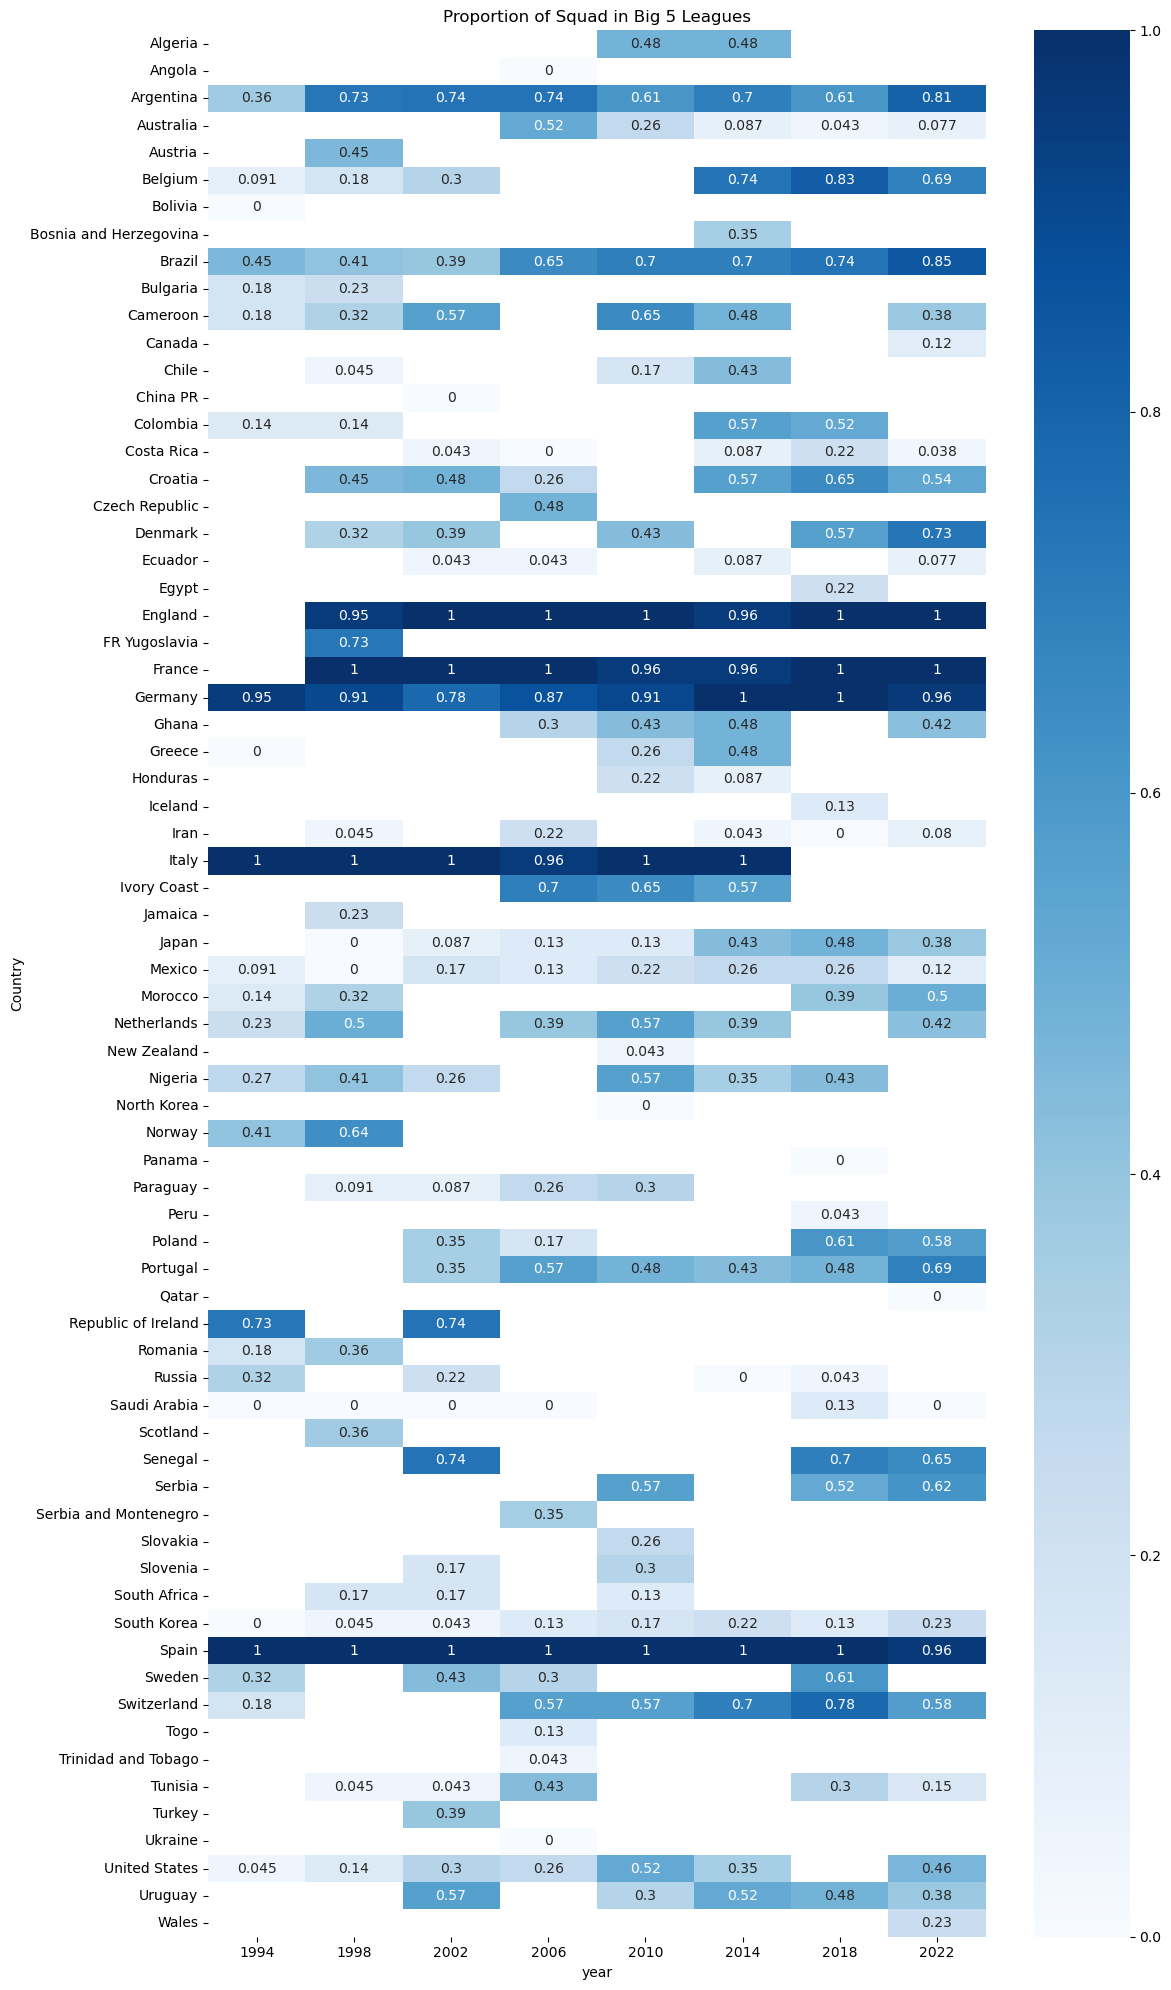

In [11]:
# final_df.columns
plt.figure(figsize=(12,20))
sns.heatmap(
    final_df.groupby(['year', 'Country'])\
        .agg({'Big5_flag':'mean'}).reset_index()\
            .pivot(columns='year', index='Country', values='Big5_flag'), annot=True, cmap='Blues')

plt.title('Proportion of Squad in Big 5 Leagues')
plt.tight_layout()
plt.show()

In [12]:
final_df['Country'].nunique()

70

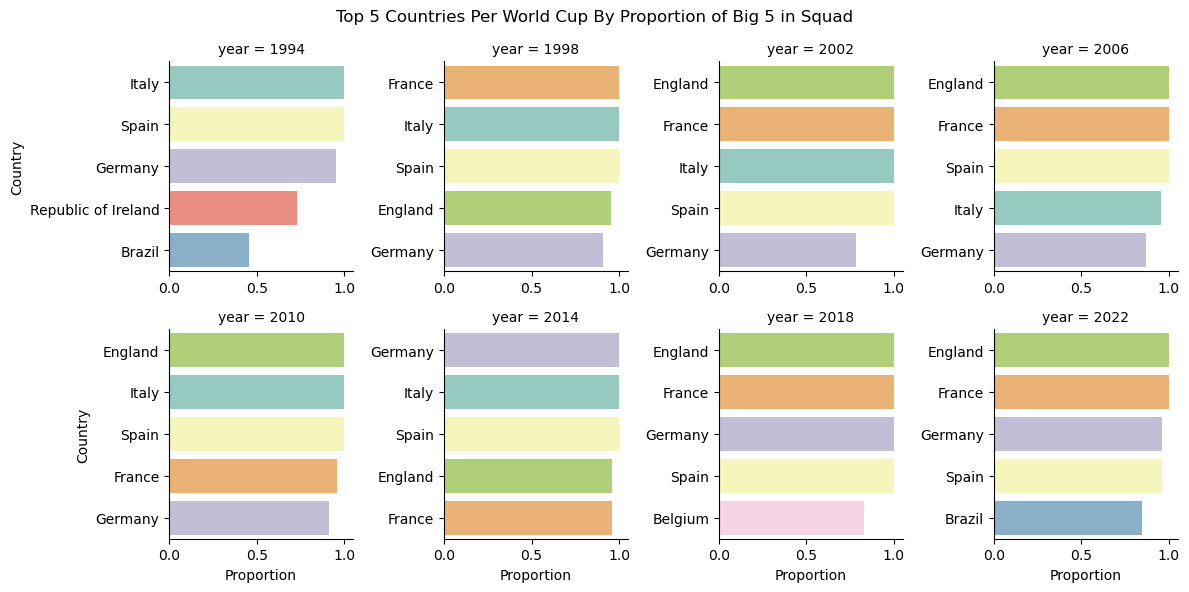

In [ ]:
# top 5 countries in each wc by proportion of squad in big5
top5 = final_df.groupby(['year', 'Country'])\
        .agg({'Big5_flag':'mean'}).reset_index()

top5 = top5[top5.groupby('year')['Big5_flag']\
      .rank(method='first', ascending=False) <= 5]\
        .sort_values(by=['year', 'Big5_flag'], ascending=[True, False])

c = sns.catplot(
    data=top5,
    x='Big5_flag', y='Country',
    col='year', kind='bar',
    col_wrap=4, sharey=False,
    sharex=False, height=3,
    hue='Country', palette='Set3'
)

c.figure.suptitle('Top 5 Countries Per World Cup By Proportion of Big 5 in Squad')
c.set_axis_labels('Proportion', 'Country')
plt.tight_layout()
plt.show()

#### adding squad level data to team performance data

In [15]:
team_perf = pd.read_csv('perf_by_wc_team_incl2022.csv')
team_perf.head()

,world_cup_year,host_country,team,max_stage,max_stage_numeric,matches_played,matches_won,goals_for,goals_against
0,1986,Mexico,Algeria,Group stage,1.0,3.0,0.0,1.0,5.0
1,1990,Italy,Algeria,Did not qualify,0.0,0.0,0.0,0.0,0.0
2,1994,USA,Algeria,Did not qualify,0.0,0.0,0.0,0.0,0.0
3,1998,France,Algeria,Did not qualify,0.0,0.0,0.0,0.0,0.0
4,2002,Korea/Japan,Algeria,Did not qualify,0.0,0.0,0.0,0.0,0.0


In [32]:
prop_df = final_df.groupby(['year', 'Country'])\
    .agg({'Big5_flag':'mean'}).reset_index()

prop_df.head()

,year,Country,Big5_flag
0,1994,Argentina,0.363636
1,1994,Belgium,0.090909
2,1994,Bolivia,0.000000
3,1994,Brazil,0.454545
4,1994,Bulgaria,0.181818


In [33]:
# since prop_df only has countries that participated in world cups from 1994 onwards
df = team_perf[(team_perf['world_cup_year']>=1994) & (team_perf['max_stage']!='Did not qualify')]\
    .merge(prop_df, how='left', left_on=['world_cup_year', 'team'], right_on=['year', 'Country'])

df[df['Country'].isna()] # get mismatches

,world_cup_year,host_country,team,max_stage,max_stage_numeric,matches_played,matches_won,goals_for,goals_against,year,Country,Big5_flag
39,2002,Korea/Japan,China,Group stage,1.0,3.0,0.0,0.0,9.0,NaN,NaN,NaN
165,2006,Germany,Serbia,Group stage,1.0,3.0,0.0,2.0,10.0,NaN,NaN,NaN
215,1998,France,Yugoslavia,Round of 16,2.0,4.0,2.0,5.0,4.0,NaN,NaN,NaN


In [34]:
for c, y in zip(prop_df['Country'], prop_df['year']):
    if ('China' in c) & (2002==y):
        print(c, y)
    elif ('Serbia' in c) & (2006==y):
        print(c, y)
    elif ('Yugoslavia' in c) & (1998==y):
        print(c, y)

FR Yugoslavia 1998
China PR 2002
Serbia and Montenegro 2006


In [37]:
# update country names in prop_df
country_map = {
    "China PR":"China",
    "Serbia and Montenegro":"Serbia",
    "FR Yugoslavia":"Yugoslavia"
}

prop_df['Country'] = prop_df['Country'].map(country_map).fillna(prop_df['Country'])

In [38]:
# recheck
df = team_perf[(team_perf['world_cup_year']>=1994) & (team_perf['max_stage']!='Did not qualify')]\
    .merge(prop_df, how='left', left_on=['world_cup_year', 'team'], right_on=['year', 'Country'])

df[df['Country'].isna()] # get mismatches

,world_cup_year,host_country,team,max_stage,max_stage_numeric,matches_played,matches_won,goals_for,goals_against,year,Country,Big5_flag


In [40]:
df = df.drop(columns=['year', 'Country'])
df.head()

,world_cup_year,host_country,team,max_stage,max_stage_numeric,matches_played,matches_won,goals_for,goals_against,Big5_flag
0,2010,South Africa,Algeria,Group stage,1.0,3.0,0.0,0.0,2.0,0.478261
1,2014,Brazil,Algeria,Round of 16,2.0,4.0,1.0,7.0,7.0,0.478261
2,2006,Germany,Angola,Group stage,1.0,3.0,0.0,1.0,2.0,0.000000
3,1994,USA,Argentina,Round of 16,2.0,4.0,2.0,8.0,6.0,0.363636
4,1998,France,Argentina,Quarter-finals,3.0,5.0,4.0,10.0,4.0,0.727273
